
**Hass Consulting Price prediction**

**1. Defining the Question**

Hass consulting is looking to determine which factors affect the price of houses for sale. This will be used in coming up with a model that predicts the price of the houses when the various factors are fed into the model. 



**a. Research Question**

Creating a model that will allow the company to accurately predict the sale  prices upon being provided with the predictor variables. 

The following approaches will be used to find the best model for the prediction:

* Multiple Linear Regression  
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression




**b.Metric of Success.**

A pricing model that predicts the price of house at an accuracy of more than 80%



**c. Research Approach**

Perform EDA Perform any necessary feature engineering Check of multicollinearity Start building the model Cross-validate the model Compute RMSE Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test.

In [ ]:
# importing of all libraries to use in the project.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import KFold
import scipy as sp
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Data Loading and Understanding**

In [ ]:
# loading of the dataset and previewing the first 5 columns
house = pd.read_csv('Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The ID column doesn't look relevant for the analysis and should be dropped.

In [ ]:
house = house.drop(['id'], 1)

In [ ]:
# checking the shape of our dataset 
house.shape

(21613, 19)

The dataset has 21613 columns and 19 rows

In [ ]:
# checking the information about the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

The columns are a mix of float and intergers 

In [ ]:
# checking for null values
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The data contains no null values

In [ ]:
# checking for duplicate values in the data set

house.duplicated().sum()


5

The data has 5 duplicate values, dropping the duplicates to ensure a clean dataset

In [ ]:
# dropping the duplicate columns
house.drop_duplicates(inplace= True)

In [ ]:
# checking to confirm that all duplicates have been dropped
house.duplicated().sum()

0

**Performing EDA**

In [ ]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.401924e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.673996e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


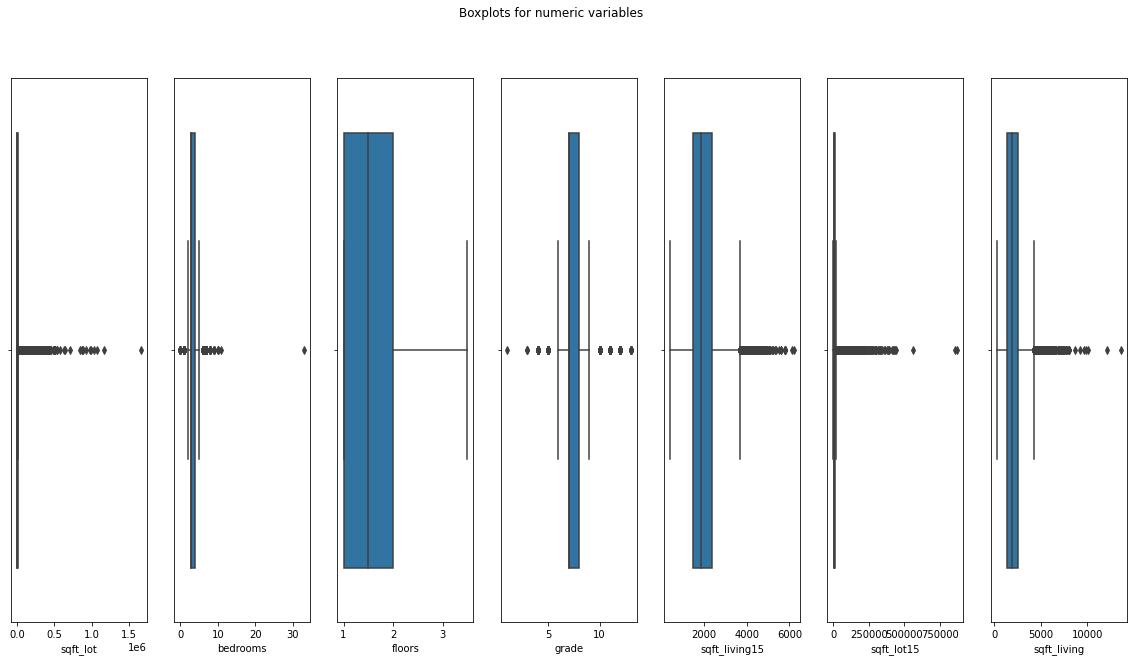

In [ ]:
# Checking for outliers on select numeric variables
fig, ((ax1, ax2, ax3,ax4,ax5,ax6,ax7)) = plt.subplots(1,7, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(house['sqft_lot'], ax=ax1)
sns.boxplot(house['bedrooms'], ax=ax2)
sns.boxplot(house['floors'], ax=ax3)
sns.boxplot(house['grade'], ax=ax4)
sns.boxplot(house['sqft_living15'], ax=ax5)
sns.boxplot(house['sqft_lot15'], ax=ax6)
sns.boxplot(house['sqft_living'], ax=ax7)
plt.show()

A sample of the columns shows that the following have outliers; bedrooms, sqt_lot, sqt_living. Being that the dataset is the characteristics of different houses, it is okay to keep the outliers on the assumption that this characteristics are true for some of the unique houses eg houses with more than 3o bedrooms.
Some of the regression models we intend to use work with outliers.

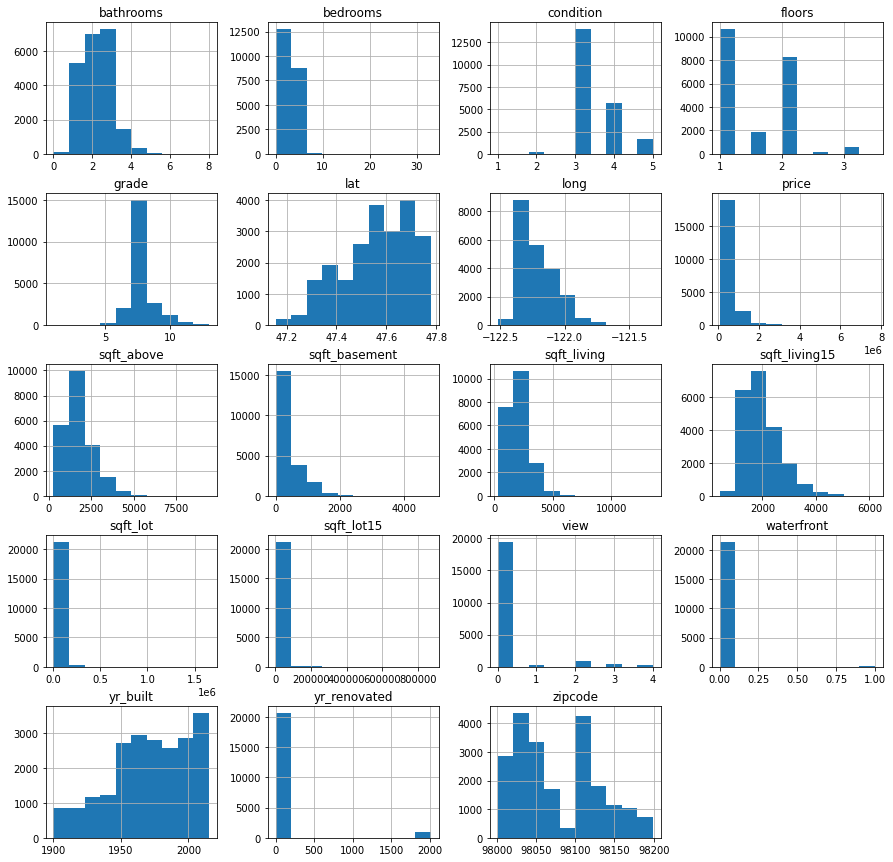

In [57]:
house.hist(bins=10, figsize=(15,15))
plt.show()

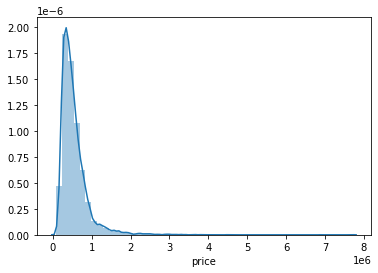

In [ ]:
# Disitribution of price
sns.distplot(house['price'])


The prices data is skewed, most house price fall on the lower side with a few extreme prices.

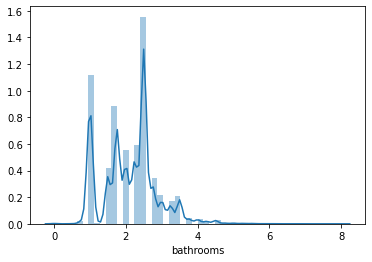

In [60]:
# Ditribution plot for bathrooms
sns.distplot(house['bathrooms'])

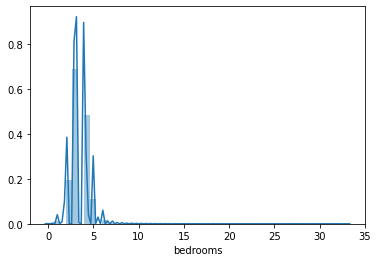

In [61]:
# Ditribution plot for bedrooms
sns.distplot(house['bedrooms'])

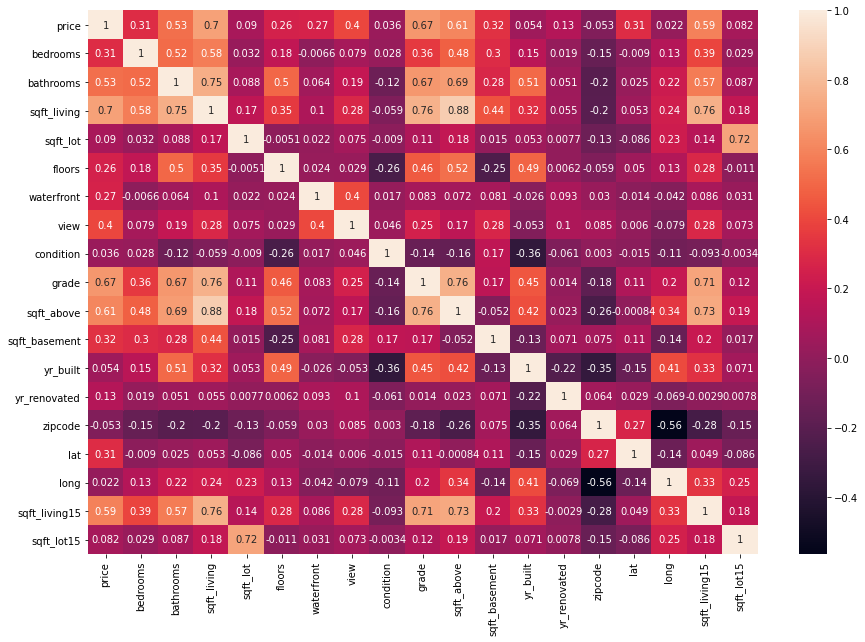

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(house.corr(), annot=True, ax=ax);

There is a high correlation bvetween latitude and the zipcode of the houses.

In [ ]:
# Using VIF to check for multicollinearity
correlations = house.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,3.331152,0.301698,-0.286949,-1.043528e+00,-0.048124,-0.033122,-0.457064,-0.368434,-0.156072,-1.023203,-4.190969e-01,-9.976207e-02,0.698282,-0.072941,0.282677,-0.757515,0.274198,-0.134711,0.094665
bedrooms,0.301698,1.679355,-0.487414,-1.177419e+00,0.044970,0.046899,0.021678,0.081061,-0.064752,0.214121,6.489779e-02,2.808785e-02,0.197724,0.039191,0.105766,-0.017749,0.042365,0.013152,0.093987
bathrooms,-0.286949,-0.487414,3.376068,-1.762355e+00,-0.019907,-0.672697,0.049465,-0.010620,-0.123837,-0.180120,4.326690e-01,-1.779862e-01,-0.995918,-0.254161,0.017436,0.024210,0.030220,0.103708,0.063268
sqft_living,-1.046492,-1.176923,-1.764642,-1.595939e+13,-0.154950,0.550680,-0.276686,0.516958,-0.461154,-1.356054,1.438927e+13,7.690563e+12,0.442336,-0.107649,-0.376004,0.244866,-0.063106,-0.928170,-0.117696
sqft_lot,-0.048124,0.044970,-0.019907,-1.557339e-01,2.103202,0.045698,0.033973,-0.053791,0.032779,-0.039019,-3.934009e-02,4.116880e-02,0.088656,0.022350,-0.006663,0.064276,-0.137176,0.165854,-1.460652
floors,-0.033122,0.046899,-0.672697,5.523758e-01,0.045698,2.012191,-0.000967,-0.036468,0.091411,-0.219721,-9.901999e-01,3.548089e-01,-0.487868,-0.079223,-0.173584,-0.120054,0.161255,0.273684,0.071751
waterfront,-0.457064,0.021678,0.049465,-2.763419e-01,0.033973,-0.000967,1.266682,-0.442302,0.008595,0.189682,3.239952e-01,2.122101e-01,-0.116906,-0.055842,-0.016224,0.113750,-0.010387,0.072871,-0.031468
view,-0.368434,0.081061,-0.010620,5.155525e-01,-0.053791,-0.036468,-0.442302,1.476069,-0.003866,-0.072241,-2.749345e-01,-4.382565e-01,0.074402,-0.031054,-0.171902,0.202435,0.041630,-0.310420,-0.017944
condition,-0.156072,-0.064752,-0.123837,-4.616481e-01,0.032779,0.091411,0.008595,-0.003866,1.256772,-0.006544,5.355115e-01,1.531615e-01,0.528747,0.210328,0.148029,0.099217,-0.019739,0.082218,-0.032674
grade,-1.023203,0.214121,-0.180120,-1.358666e+00,-0.039019,-0.219721,0.189682,-0.072241,-0.006544,3.732814,3.244686e-02,3.537454e-01,-0.852826,-0.049030,-0.003655,-0.098411,0.309109,-0.870797,0.042851


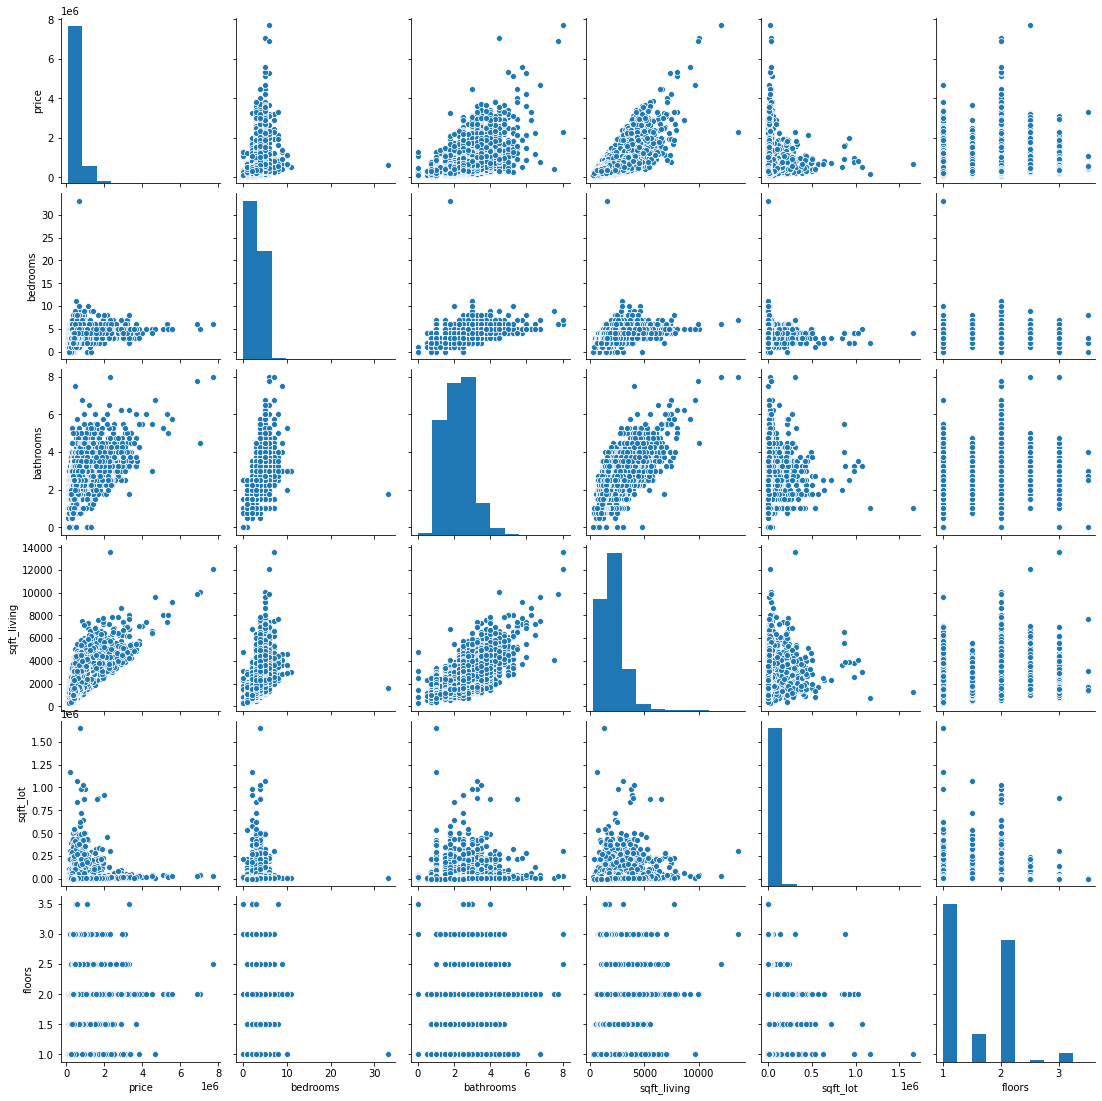

In [62]:
df = pd.DataFrame(house, columns= ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors'])

sns.pairplot(df) 
plt.show()

Price and the sqft living and number of bathrooms are linearly correlates

**Multilinear Regression**

In [ ]:
# Dividing the data into attributes and labels

X = house.drop(['price'], 1)
y = house['price']

In [ ]:
# Dividing our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the Algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9791,216500.0,7.991886e+04
10281,451000.0,3.314367e+05
19722,673000.0,6.278518e+05
20059,650000.0,4.510438e+05
21204,1060000.0,8.150790e+05
...,...,...
17763,530000.0,6.979120e+05
13212,370000.0,5.209944e+05
8109,440000.0,5.260139e+05
19727,334950.0,2.296024e+05


In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

7510451.623265542
[-3.45352655e+04  3.75780990e+04  1.12685206e+02  1.66899762e-01
  6.56593749e+03  6.21475299e+05  5.14387542e+04  2.75014531e+04
  9.72658765e+04  7.25608848e+01  4.01243215e+01 -2.54986749e+03
  2.20918175e+01 -6.11803080e+02  6.02280630e+05 -2.30533255e+05
  1.96192046e+01 -4.27462158e-01]


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 124447.90142583508
Mean Squared Error: 37944546667.3555
Root Mean Squared Error: 194793.60017042526


In [ ]:
score = regressor.score(X_train, y_train)
score2 = regressor.score(X_test, y_test)

print('Training set accuracy: ', '%.2f'%(score))
print('Test set accuracy: ', '%.2f'%(score2))

Training set accuracy:  0.70
Test set accuracy:  0.69


In [ ]:
# In multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, we execute the following:

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.210e+04
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                        0.00
Time:                        03:03:25   Log-Likelihood:                     -2.9455e+05
No. Observations:               21608   AIC:                                  5.891e+05
Df Residuals:                   21591   BIC:                                  5.893e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

**Heteroskedasticity testing**

In [ ]:

X = house.drop(['price'], 1)
y = house['price']

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

3954.2673438845554

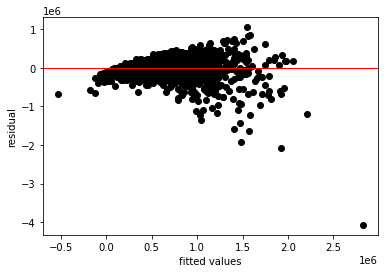

In [ ]:
plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
test_result, p_value = sp.stats.bartlett(price_predict, residuals)

degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


The variance is the same and there is no need to reasses our model 

**Quantile regression**

In [64]:
X = house.drop('price', 1)
y = house['price']	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
print(regressor.intercept_)
print(regressor.coef_)

7510451.623265542
[-3.45352655e+04  3.75780990e+04  1.12685206e+02  1.66899762e-01
  6.56593749e+03  6.21475299e+05  5.14387542e+04  2.75014531e+04
  9.72658765e+04  7.25608848e+01  4.01243215e+01 -2.54986749e+03
  2.20918175e+01 -6.11803080e+02  6.02280630e+05 -2.30533255e+05
  1.96192046e+01 -4.27462158e-01]


In [63]:
import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', house)
res = mod.fit(q=.6)
print(res.summary())


ValueError: ignored

In [ ]:
 # We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
  res = mod.fit(q = qt )
  models.append(res)
  params.append([qt, res.params['Intercept'], res.params['X[1]']] + res.conf_int().loc['X[1]'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

NameError: ignored

**Ridge Regression**

In [ ]:
X = house.drop(['price'], 1)
y = house['price']

regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

40519386486.31279


In [ ]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

41017101081.94273

In [ ]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

40525706841.49802


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 110.49990326234324,
 'bedrooms': 41088.76364440916,
 'condition': 96004.06737731984,
 'floors': 582598.1380510816,
 'grade': 70.80825719623441,
 'lat': -214739.93542334286,
 'long': 21.67655146196034,
 'price': -35775.567178820726,
 'sqft_above': 39.69164610729983,
 'sqft_basement': -2622.1032881381857,
 'sqft_living': 0.12812851350163693,
 'sqft_living15': -0.382348352970439,
 'sqft_lot': 6766.109342179329,
 'view': 26450.504782338852,
 'waterfront': 53037.026128995545,
 'yr_built': 20.036111054043882,
 'yr_renovated': -582.6741616966208,
 'zipcode': 602893.8562143798}

**Lasso Regression**

In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [45]:
X = house.drop('price', 1)
y =house['price']

In [46]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [47]:
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)   

lasso score: 0.6998035713813898
lasso MSE: 40519386528.39081
lasso coef: [-33273.00440197  31640.8475282  259508.82973164   5304.35712285
   3652.75160569  50408.62565933  40634.43532435  17212.01865124
 112851.20788461 -83825.88208458 -58573.40740486 -77011.34224167
   8043.91639671 -31173.82941938  83544.50334251 -30238.64811199
  14851.19704761 -10437.7585076 ]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.7032623265799878
linear score: 0.7031681626685546
lasso MSE: 38807843943.2592
linear MSE: 38820158855.40996
lasso best estimator coef: [-32626.35778879  31121.6500788  264444.8863483    7285.14557942
   3951.78910256  49050.76278466  40462.34295541  16133.64698028
 113397.76688777 -86448.16840415 -58859.51378571 -77256.07721191
   7968.66021502 -33977.65681365  84256.33941155 -31220.03627979
  12855.70782032 -11478.95381128]
linear coef: [-3.24864875e+04  3.12520507e+04  6.36704551e+17  7.35227275e+03
  4.23477087e+03  4.90792898e+04  4.03339855e+04  1.60960067e+04
  1.13304246e+05 -5.74064137e+17 -3.06817257e+17 -7.72447437e+04
  7.96996621e+03 -3.40253532e+04  8.42370269e+04 -3.12767119e+04
  1.30595272e+04 -1.14892400e+04]


**Elastic Net Regression**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
X = house.drop('price', 1)
y =house['price']

In [52]:
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 


40519386486.31279


In [53]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 41088.76364440916,
 'bedrooms': -35775.567178820726,
 'condition': 26450.504782338852,
 'floors': 6766.109342179329,
 'grade': 96004.06737731984,
 'lat': 602893.8562143798,
 'long': -214739.93542334286,
 'sqft_above': 70.80825719623441,
 'sqft_basement': 39.69164610729983,
 'sqft_living': 110.49990326234324,
 'sqft_living15': 21.67655146196034,
 'sqft_lot': 0.12812851350163693,
 'sqft_lot15': -0.382348352970439,
 'view': 53037.026128995545,
 'waterfront': 582598.1380510816,
 'yr_built': -2622.1032881381857,
 'yr_renovated': 20.036111054043882,
 'zipcode': -582.6741616966208}

In [54]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [55]:
search.fit(X,y)
search.best_params_
abs(search.best_score_)

41058920151.34104